# Gaia TGAS + 2MASS + WISE

The provided Gaia dataset is a dump of the Gaia science archive's match between the astrometry in the Tycho-Gaia Astrometric Solution (TGAS) and photometric sources in 2MASS and WISE. The data contains all of the columns provided in the TGAS catalog ([described here](https://www.cosmos.esa.int/web/gaia/dr1)) along with photometric columns from the 2MASS and WISE catalogs. 

The 2MASS photometry is in the $J$, $H$, and $K_s$ bands, so the corresponding magnitude measurements are stored in the columns `j_m`, `h_m`, `ks_m`. The uncertainties for each magnitude balue are in the columns `j_msigcom`, `h_msigcom`, `ks_msigcom`.

The WISE filters are named $W1$-$W4$, so the magnitudes and uncertainties are `w*mpro` and `w*mpro_error` with the `*` replaced by the filter number, 1-4.

In [3]:
from os import path
import numpy as np

import astropy.coordinates as coord
import astropy.units as u
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
plt.style.use('notebook.mplstyle')
%matplotlib inline
import numpy as np

In [10]:
data_path = '../../data'

# Reading the Gaia TGAS data

The data are all stored in a single FITS binary table and can be read using the `astropy.table.Table` class:

In [12]:
tgas = Table.read(path.join(data_path, 'gaia', 'tgas_2mass_wise.fits'))

In [13]:
print(tgas.colnames)

['hip', 'tycho2_id', 'solution_id', 'source_id', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_good_obs_al', 'astrometric_n_good_obs_ac', 'astrometric_n_bad_obs_al', 'astrometric_n_bad_obs_ac', 'astrometric_delta_q', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_primary_flag', 'astrometric_relegation_factor', 'astrometric_weight_al', 'astrometric_weight_ac', 'astrometric_priors_used', 'matched_observations', 'duplicated_source', 'scan_direction_strength_k1', 'scan_direction_strength_k2', 'scan_direction_strength_k3', 'scan_direction_strength_k4', 'scan_direction_mean_k1', 'scan_direction_mean_k2', 'scan_direction_mean

---

As an example of using the data, let's make two color-magnitude diagrams for all stars within 150 pc:

In [14]:
with u.set_enabled_equivalencies(u.parallax()):
    dist = coord.Distance((tgas['parallax'] * u.mas).to(u.pc), 
                          allow_negative=True)
    
dist_cut = (dist < 256. * u.pc) & (dist > 0)

Compute absolute magnitude using the distance to each star, and compute colors by differencing magnitudes:

In [15]:
M_G = tgas['phot_g_mean_mag'][dist_cut] - dist[dist_cut].distmod.value
G_J = tgas['phot_g_mean_mag'][dist_cut] - tgas[dist_cut]['j_m']
G_W1 = tgas['phot_g_mean_mag'][dist_cut] - tgas[dist_cut]['w1mpro']

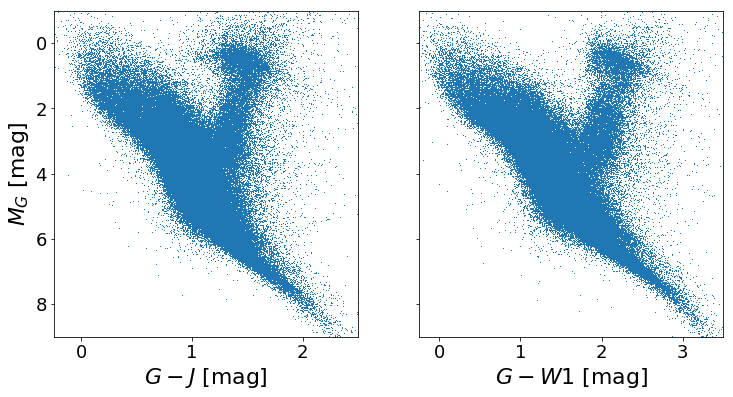

In [16]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
axes[0].plot(G_J, M_G, marker=',', linestyle='none')
axes[1].plot(G_W1, M_G, marker=',', linestyle='none')

axes[0].set_xlim(-0.25, 2.5)
axes[0].set_ylim(9, -1)

axes[1].set_xlim(-0.25, 3.5)

axes[0].set_xlabel('$G-J$ [mag]')
axes[1].set_xlabel('$G-W1$ [mag]')
axes[0].set_ylabel('$M_G$ [mag]')

/Users/dreiss/miniconda3/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)
/Users/dreiss/miniconda3/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)


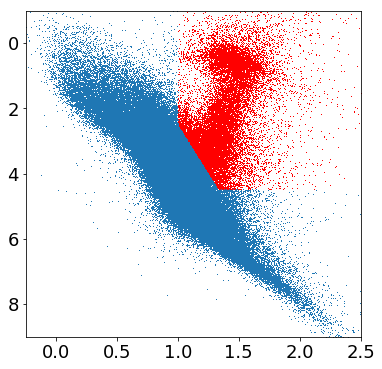

In [17]:
RG = (G_J > 1.) & (M_G < (6*G_J - 3.5)) & (M_G < 4.5)

fig,ax = plt.subplots(1, 1, figsize=(6, 6), sharey=True)

ax.plot(G_J, M_G, marker=',', linestyle='none')
ax.plot(G_J[RG], M_G[RG], marker=',', linestyle='none', color='r')

ax.set_xlim(-0.25, 2.5)
ax.set_ylim(9, -1)

axes[0].set_xlabel('$G-J$ [mag]')
axes[0].set_ylabel('$M_G$ [mag]')

In [18]:
import pandas as pd

tgas = tgas.to_pandas()

In [19]:
tgas.head()

,hip,tycho2_id,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,ks_m,ks_msigcom,w1mpro,w1mpro_error,w2mpro,w2mpro_error,w3mpro,w3mpro_error,w4mpro,w4mpro_error
0,1.398900e+04,,1.635378e+18,7.627862e+12,243619.0,2015.0,45.034330,0.305989,0.235392,0.218802,...,6.019,0.020,5.970,0.113,5.921,0.039,5.985,0.015,5.905,0.042
1,-2.147484e+09,55-28-1,1.635378e+18,9.277129e+12,487238.0,2015.0,45.165007,2.583882,0.200068,1.197789,...,9.349,0.019,9.301,0.022,9.337,0.020,9.266,0.035,9.133,0.502
2,-2.147484e+09,55-1191-1,1.635378e+18,1.329722e+13,1948952.0,2015.0,45.086155,0.213836,0.248825,0.180326,...,9.780,0.022,9.729,0.023,9.750,0.021,9.721,0.042,8.683,NaN
3,-2.147484e+09,55-624-1,1.635378e+18,1.346902e+13,102321.0,2015.0,45.066542,0.276039,0.248211,0.200958,...,9.875,0.025,9.804,0.023,9.823,0.020,9.789,0.041,8.844,NaN
4,-2.147484e+09,55-849-1,1.635378e+18,1.573676e+13,409284.0,2015.0,45.136038,0.170697,0.335044,0.170130,...,8.250,0.026,8.131,0.023,8.172,0.020,8.124,0.021,8.467,0.311


In [20]:
print(tgas.columns)
tg = tgas[['ra','dec','parallax','pmra','pmdec','phot_g_mean_mag','j_m','h_m','w1mpro',
           'w2mpro', 'w3mpro', 'w4mpro']]

Index(['hip', 'tycho2_id', 'solution_id', 'source_id', 'random_index',
       'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr',
       'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_good_obs_ac',
       'astrometric_n_bad_obs_al', 'astrometric_n_bad_obs_ac',
       'astrometric_delta_q', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_primary_flag',
       'astrometric_relegation_factor', 'astrometric_weight_al',
       'astrometric_weight_ac', 'astrometric_priors_used',
       'matched_observations', 'duplicated_source',
       'scan_direction_strength_k1', 'scan_direction_strength_k2',
       'scan_direction_stren

In [21]:
with u.set_enabled_equivalencies(u.parallax()):
    dist = coord.Distance((tg['parallax'].values * u.mas).to(u.pc), 
                          allow_negative=True)
dist_cut = (dist < 256. * u.pc) & (dist > 0)
print(dist_cut.shape, dist.shape)
tg = tg[dist_cut]
print(tg.shape)

M_G = tg['phot_g_mean_mag'] - dist[dist_cut].distmod.value
G_J = tg['phot_g_mean_mag'] - tg['j_m']
G_W1 = tg['phot_g_mean_mag'] - tg['w1mpro']

RG = (G_J > 1.) & (M_G < (6*G_J - 3.5)) & (M_G < 4.5)

(2058601,) (2058601,)
(326264, 12)


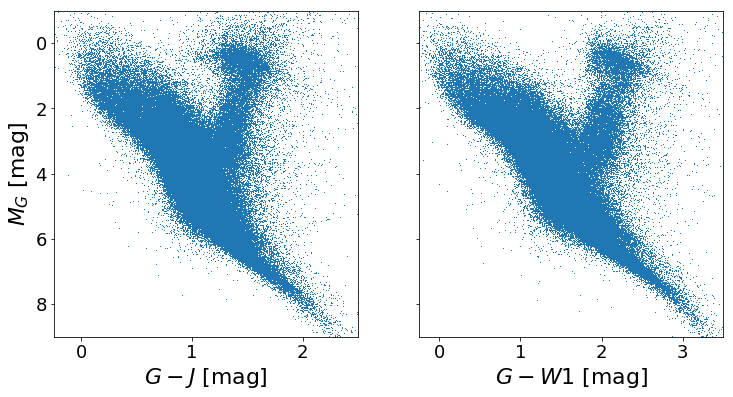

In [22]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
axes[0].plot(G_J, M_G, marker=',', linestyle='none')
axes[1].plot(G_W1, M_G, marker=',', linestyle='none')

axes[0].set_xlim(-0.25, 2.5)
axes[0].set_ylim(9, -1)

axes[1].set_xlim(-0.25, 3.5)

axes[0].set_xlabel('$G-J$ [mag]')
axes[1].set_xlabel('$G-W1$ [mag]')
axes[0].set_ylabel('$M_G$ [mag]')

In [23]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1e5, fit_intercept=True)

print(np.where(np.isnan(RG)))
bad = np.isnan(G_J) | np.isnan(G_W1)
M_G = M_G[~bad]
G_J = G_J[~bad]
G_W1 = G_W1[~bad]
RG_new = RG[~bad]

X = np.vstack([M_G, G_J, G_W1]).T
print(X.shape, RG_new.shape)
logreg.fit(X, RG_new)

(array([], dtype=int64),)
(298856, 3) (298856,)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [24]:
print(logreg.coef_)
print(logreg.intercept_)

[[ -4.48804057  18.47006278   2.3739065 ]]
[-11.3113718]


In [25]:
Z = logreg.predict(X)
Z

array([ True, False, False, ..., False, False, False], dtype=bool)

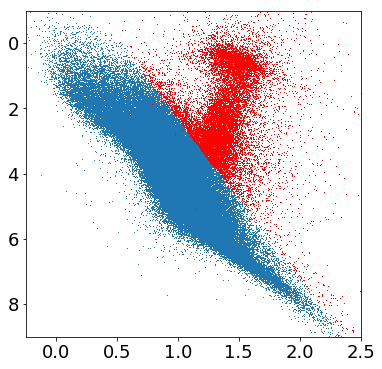

In [26]:
fig,ax = plt.subplots(1, 1, figsize=(6, 6), sharey=True)

ax.plot(G_J, M_G, marker=',', linestyle='none')
ax.plot(G_J[Z], M_G[Z], marker=',', linestyle='none', color='r')

ax.set_xlim(-0.25, 2.5)
ax.set_ylim(9, -1)

axes[0].set_xlabel('$G-J$ [mag]')
axes[0].set_ylabel('$M_G$ [mag]')

In [27]:
logreg.score(X, RG_new)

0.98897462322991669

In [28]:
print(tgas.shape)
tg = tg.dropna()
print(tg.shape)

with u.set_enabled_equivalencies(u.parallax()):
    dist = coord.Distance((tg['parallax'].values * u.mas).to(u.pc), 
                          allow_negative=True)
dist_cut = (dist < 256. * u.pc) & (dist > 0)
print(dist_cut.shape, dist.shape)
tg = tg[dist_cut]
print(tg.shape)

M_G = tg['phot_g_mean_mag'] - dist[dist_cut].distmod.value
G_J = tg['phot_g_mean_mag'] - tg['j_m']
G_W1 = tg['phot_g_mean_mag'] - tg['w1mpro']

RG = (G_J > 1.) & (M_G < (6*G_J - 3.5)) & (M_G < 4.5)
#RG_new = RG[~bad.value]
print(tg.shape, RG.shape)

(2058601, 73)
(298633, 12)
(298633,) (298633,)
(298633, 12)
(298633, 12) (298633,)


In [29]:
#X = np.vstack([M_G, G_J, G_W1]).T
#print(X.shape, RG_new.shape)
logreg.fit(tg, RG)

Z = logreg.predict(tg)

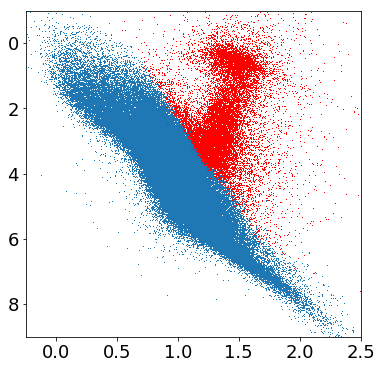

In [30]:
fig,ax = plt.subplots(1, 1, figsize=(6, 6), sharey=True)

ax.plot(G_J, M_G, marker=',', linestyle='none')
ax.plot(G_J[Z], M_G[Z], marker=',', linestyle='none', color='r')

ax.set_xlim(-0.25, 2.5)
ax.set_ylim(9, -1)

axes[0].set_xlabel('$G-J$ [mag]')
axes[0].set_ylabel('$M_G$ [mag]')

In [32]:
print(logreg.coef_)
logreg.intercept_

[[ -5.16426677e-04  -1.64934782e-03  -1.49218539e+00   5.92750059e-04
   -2.45749895e-03   1.57317549e+01  -1.17392417e+01  -8.09077522e+00
   -2.68887232e+00   8.47073755e-01   1.28663034e+00   5.27814421e-01]]


array([ 21.83716842])

In [33]:
logreg.score(tg, RG)

0.99086839029845997

In [34]:
import sklearn.metrics as skm

skm.confusion_matrix(Z, RG)

array([[279480,   1870],
       [   857,  16426]])

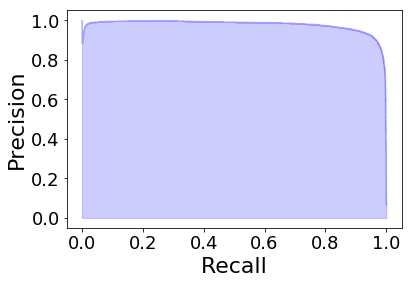

In [45]:
precision, recall, _ = skm.precision_recall_curve(RG, logreg.predict_proba(tg)[:,1])
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision');